In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
%matplotlib inline


## Load data from Github

In [2]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [3]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [4]:
countries = [
'Finland',
'France',
'Germany',
'Italy',
'Portugal',
'Spain',
'Sweden',
'Switzerland',
'United Kingdom'
]

countries = [
'France'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [5]:
lockdown_list = [
{
        'name': 'First Lockdown',
        'start_date': datetime.strptime('03/17/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('05/10/2020','%m/%d/%Y'),
        'color': 'red'
    },{
        'name': 'Second Lockdown',
        'start_date': datetime.strptime('10/30/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('12/14/2020','%m/%d/%Y'),
        'color': 'red'
    },{
        'name': 'Couvre feu 20h',
        'start_date': datetime.strptime('10/17/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('10/30/2020','%m/%d/%Y'),
        'color': 'orange'
    },{
        'name': 'Couvre feu 20h',
        'start_date': datetime.strptime('12/14/2020','%m/%d/%Y'),
        'end_date': datetime.strptime('03/18/2021','%m/%d/%Y'),
        'color': 'orange'
    },{
        'name': 'Third Lockdown',
        'start_date': datetime.strptime('03/18/2021','%m/%d/%Y'),
        'end_date': datetime.strptime('03/22/2021','%m/%d/%Y'),
        'color': 'red'
    }
]

In [6]:
def plot_serie():
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)
    
    fig, ax = plt.subplots()
    for lockdown in lockdown_list:
        ax.axvspan(lockdown['start_date'], lockdown['end_date'], alpha=0.3, color=lockdown['color'])

    for key, grp in covid_data_df.groupby(['location']): 
        ax.set_xlabel('Date')
        ax.set_ylabel('new_deaths_smoothed', color='red')
        ax.plot(grp['date'], grp['new_deaths_smoothed'], color='red')
        ax.tick_params(axis='y', labelcolor='red')
        
        ax2 = ax.twinx()
        
        ax2.set_ylabel('new_cases_smoothed', color='blue')
        ax2.plot(grp['date'], grp['new_cases_smoothed'], color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')

    
    fig.tight_layout()
    plt.xlabel('Date', fontsize=16)

    plt.show()

## Lastest data points

In [7]:
covid_data_df.sort_values(by="date", ascending=[False]).head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
25397,FRA,Europe,France,2021-03-21,4277786.0,603.0,20844.571,92119.0,0.0,219.429,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25396,FRA,Europe,France,2021-03-20,4277183.0,35038.0,24522.286,92119.0,286.0,249.000,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25395,FRA,Europe,France,2021-03-19,4242145.0,172.0,23772.857,91833.0,0.0,232.286,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25394,FRA,Europe,France,2021-03-18,4241973.0,35061.0,27345.000,91833.0,422.0,264.143,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901
25393,FRA,Europe,France,2021-03-17,4206912.0,38501.0,26354.714,91411.0,87.0,243.429,...,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901


## Load daily death data

In [8]:
path = ".\\data-preparation\\daily-death.csv"

daily_death_france_all = pd.read_csv(
    path,
    converters={'Count': str_to_float,
                'datedeces': str_to_date},
    low_memory=False
)

## Plot COVID Death against total death

In [9]:
def compose_date(years, months=1, days=1, weeks=None, hours=None, minutes=None,
                 seconds=None, milliseconds=None, microseconds=None, nanoseconds=None):
    years = np.asarray(years) - 1970
    months = np.asarray(months) - 1
    days = np.asarray(days) - 1
    types = ('<M8[Y]', '<m8[M]', '<m8[D]', '<m8[W]', '<m8[h]',
             '<m8[m]', '<m8[s]', '<m8[ms]', '<m8[us]', '<m8[ns]')
    vals = (years, months, days, weeks, hours, minutes, seconds,
            milliseconds, microseconds, nanoseconds)
    return sum(np.asarray(v, dtype=t) for t, v in zip(types, vals)
               if v is not None)

In [10]:
# remove 2020 average death
daily_death_france = daily_death_france_all[(daily_death_france_all['datedeces'] > '2010-01-01') & (daily_death_france_all['datedeces'] < '2019-01-01')]

In [11]:
daily_death_france.head(10)

,datedeces,Count
715,2018-12-31,1.0
716,2018-12-29,2.0
717,2018-12-28,2.0
718,2018-12-27,2.0
719,2018-12-26,2.0
720,2018-12-25,1.0
721,2018-12-24,2.0
722,2018-12-23,3.0
723,2018-12-22,3.0
724,2018-12-21,1.0


In [12]:
average_death_france = daily_death_france.groupby(by=daily_death_france['datedeces'].dt.dayofyear).mean()
average_death_france['date'] = compose_date(2020, days=average_death_france.index)
average_death_france.head(10)

,Count,date
datedeces,,
1,2.0,2020-01-01
2,1.0,2020-01-02
3,1.0,2020-01-03
4,2.0,2020-01-04
5,2.5,2020-01-05
7,1.0,2020-01-07
8,1.5,2020-01-08
9,1.0,2020-01-09
10,1.0,2020-01-10


In [13]:
starting_date = '2020-01-01'
ending_date = '2020-12-15'
covid_death_cropped = covid_data_df[(covid_data_df['date'] > starting_date) & (covid_data_df['date'] < ending_date)]
all_death_cropped = daily_death_france_all[(daily_death_france_all['datedeces'] > starting_date) & (daily_death_france_all['datedeces'] < ending_date)]
average_death_cropped = average_death_france[(average_death_france['date'] > starting_date) & (average_death_france['date'] < ending_date)]

In [14]:
average_death_cropped.head(10)

,Count,date
datedeces,,
2,1.0,2020-01-02
3,1.0,2020-01-03
4,2.0,2020-01-04
5,2.5,2020-01-05
7,1.0,2020-01-07
8,1.5,2020-01-08
9,1.0,2020-01-09
10,1.0,2020-01-10
11,1.0,2020-01-11


In [15]:
covid_death_cropped.loc[:,'new_deaths_rolling'] = covid_death_cropped['new_deaths'].rolling(7).sum()

C:\Users\Simon\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Simon\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [18]:
all_death_cropped.loc[:,'new_deaths_rolling'] = all_death_cropped['Count'].rolling(7).sum()
average_death_cropped.loc[:,'new_deaths_rolling'] = average_death_cropped['Count'].rolling(7).sum()

C:\Users\Simon\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


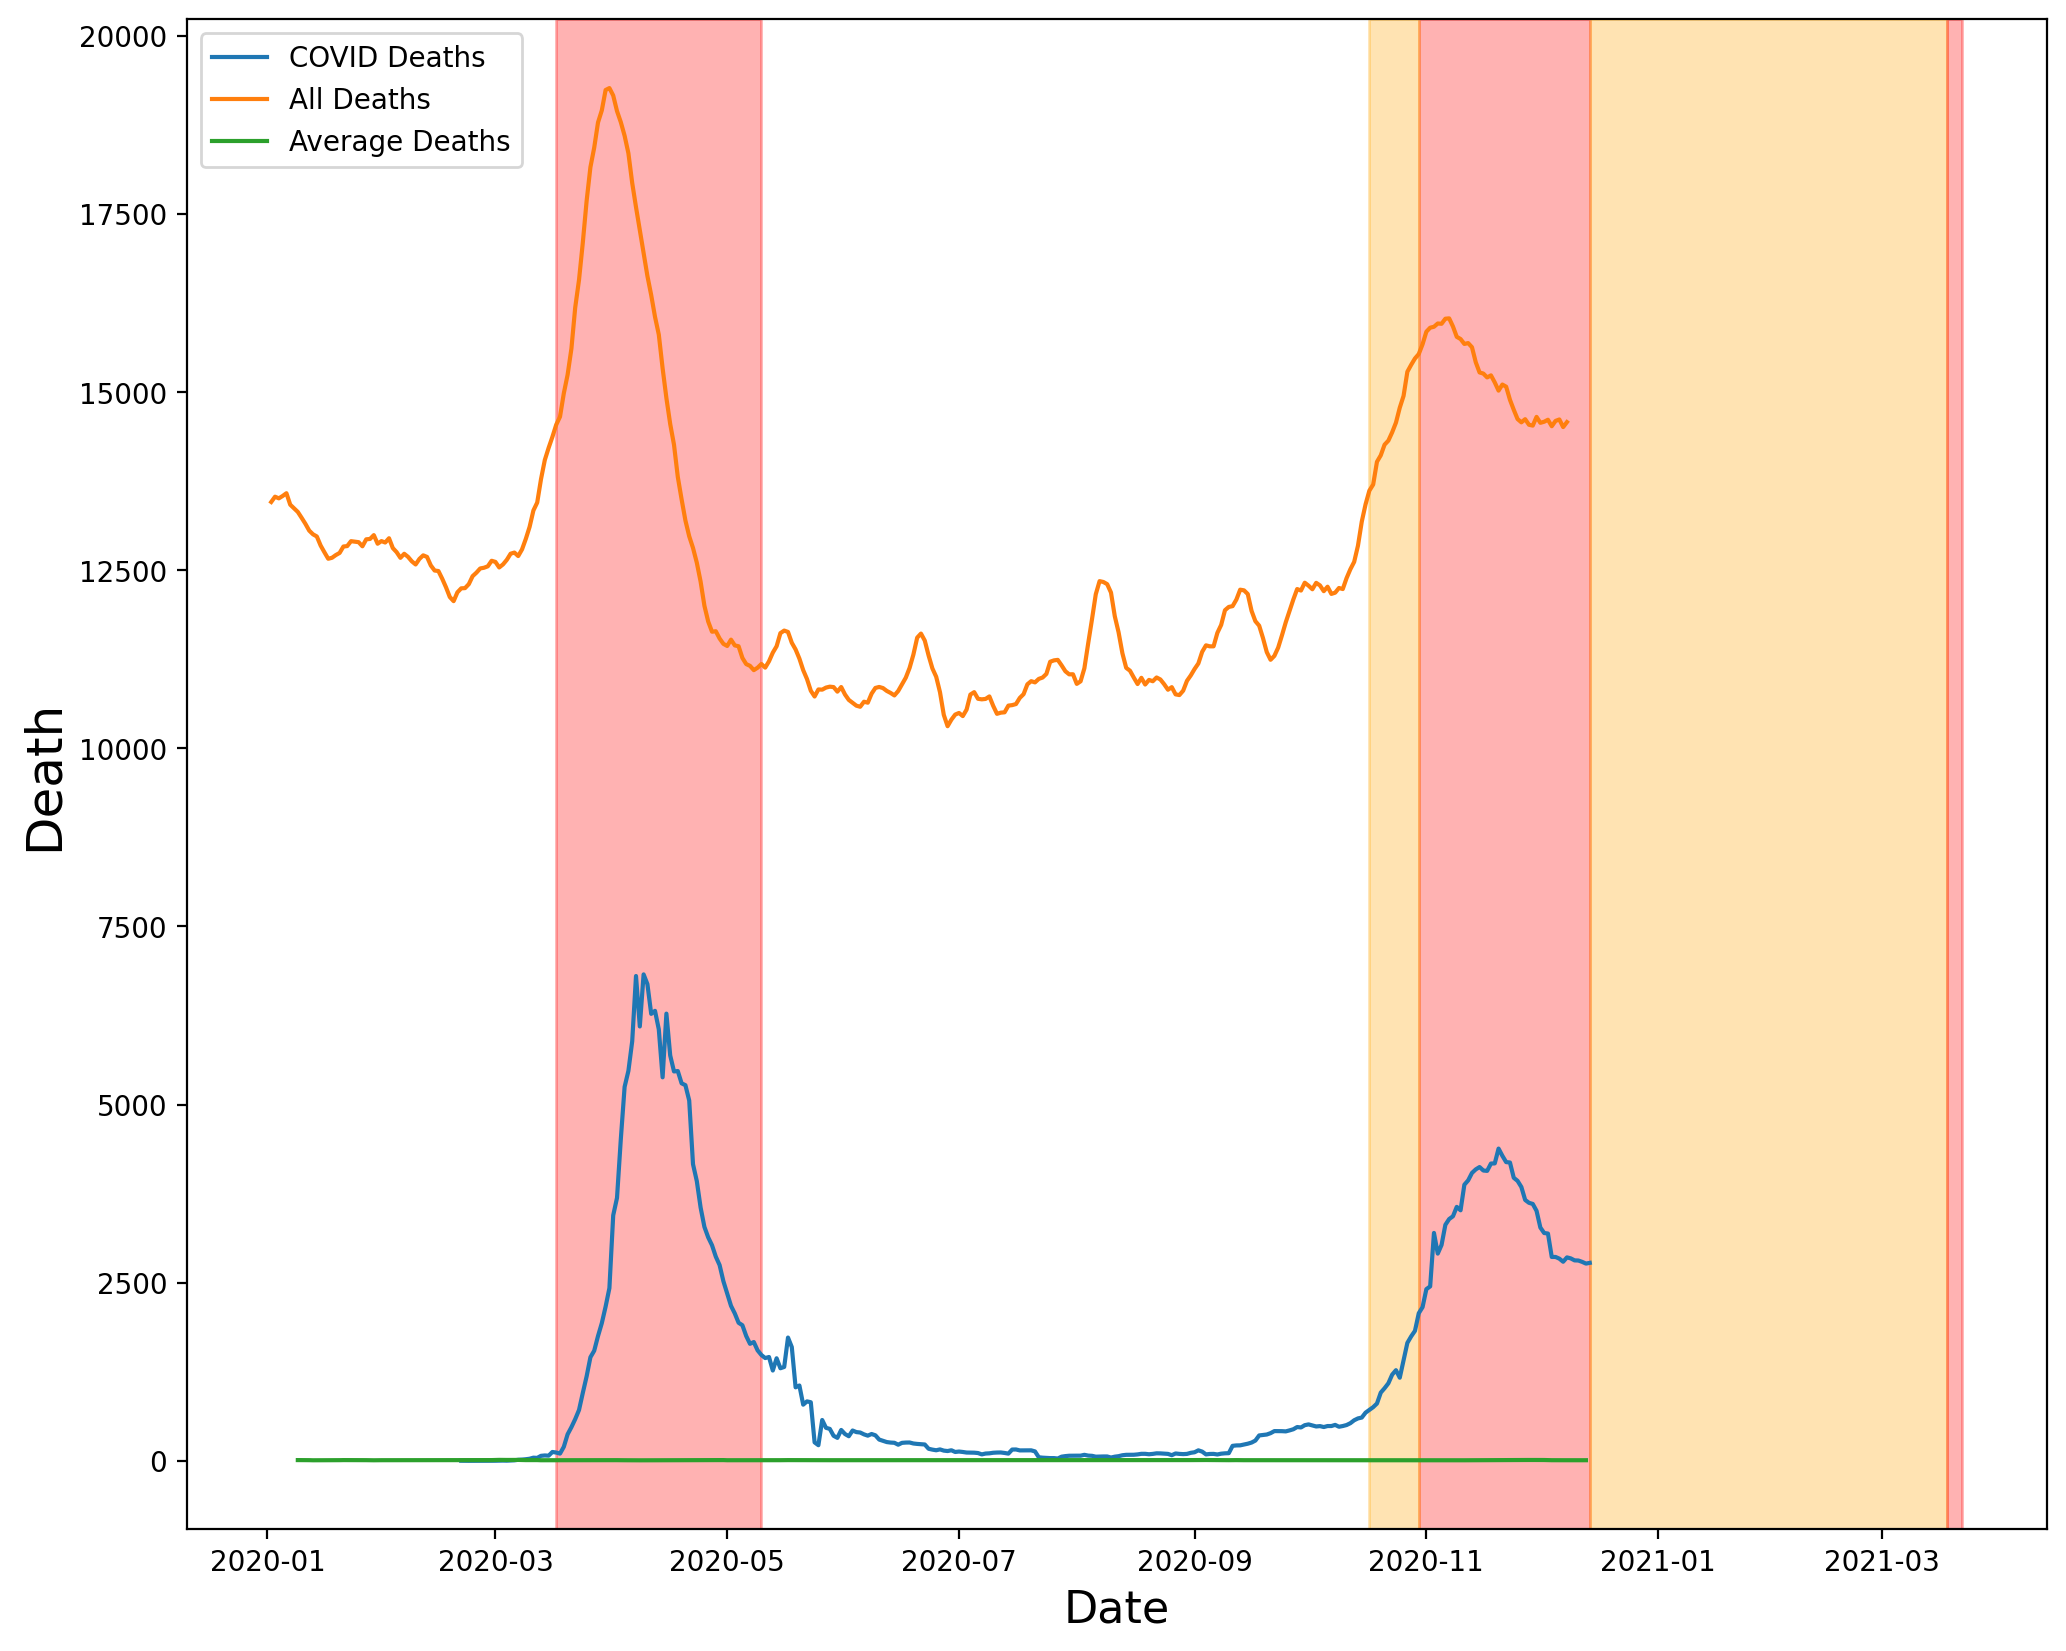

In [19]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
for lockdown in lockdown_list:
    ax.axvspan(lockdown['start_date'], lockdown['end_date'], alpha=0.3, color=lockdown['color'])
        
plt.plot(covid_death_cropped['date'], covid_death_cropped['new_deaths_rolling'], label = 'COVID Deaths')
plt.plot(all_death_cropped['datedeces'], all_death_cropped['new_deaths_rolling'], label = 'All Deaths')
plt.plot(average_death_cropped['date'], average_death_cropped['new_deaths_rolling'], label = 'Average Deaths')

plt.ylabel('Death', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.legend(loc="upper left")
plt.show()